In [24]:
import numpy as np
import pandas as pd
import matplotlib as plt
import networkx as nx
%matplotlib inline
# from DYNASMART_Process import *
from Modules import DYNASMART_Process as dy
# import preprocessing_read_skim_file as rs
from Modules import AV_functions as av
from Modules import Solve_DARP as sod
from Modules import Postprocess_DARP as pod
from Modules import Preprocess_DARP as prd
from Modules import DARP_to_DYNA as dtd
from gurobipy import *
from Modules import *
import datetime
import requests
import math
import importlib
%load_ext autoreload
%autoreload 2

In [136]:
#Read in the basic traveler and trips informationa and joint the houshold id
# traveler_info=pd.read_csv('input/traveler.csv')
personData=pd.read_csv('input/personData_1.csv')
person_type_dic=dict(zip(personData.person_id,personData.type))
traveler_trips=pd.read_csv('input/traveler_trip_info_improved.csv',index_col=0)
num_zones,num_nodes,num_links,node_detail,node_id,link_detail,link_id=dy.read_network('input/network.dat')
nodexy=dy.read_xy('input/xy.dat')
superzone_filepath='Input/SuperZone.dat'
linktraveltime_filepath='Input/output_td_linktraveltime.dat'
superzone_map=dy.read_superzone_info(superzone_filepath)
origin_path='Input/origin.dat'
destination_path='Input/destination.dat'
origins,destinations,origin_links=dy.read_origin_destion(origin_path,destination_path)
origin_links['length']=origin_links.apply(lambda row: 
                                          link_detail[int(link_id[node_id[row.u_node],node_id[row.d_node]])][0,4],axis=1)
VPNRSkim_folder_filepath='Input/vehicularPNRSkim'
Vehicular_Skim,Vehicular_Skim_Dict=dy.read_vehicle_skim(VPNRSkim_folder_filepath)
transit_skim_folderpath='Input/'
TransitMazTazFlag,drivingweight,walkingweight,\
TransitSkimTimeIntervalLength,MaxNumTransitSkimTimeInterval,WalkSpeed,transit_zone_candidates,\
Transit_AB_Cost_Skim,Transit_AB_Time_Skim,three_link_walk=dy.read_transitskim(transit_skim_folderpath)

56 57 72


In [112]:
output_flag=1
target_hh_id=2287301
# target_hh_id=2744264
min_length=15
max_length=20
single_model_runtime=60*0.5
drivingcost_per_mile=1
transit_fare=1
reward_mode=2
run_mode=0

cav_use_mode=1
num_time_interval=1

In [115]:
zz=prd.compare_mode_utlity(traveler_trips.loc
                         [(traveler_trips.tripmode !=7) & (traveler_trips.tripmode !=8)],1
                        ,three_link_walk,Transit_AB_Cost_Skim,Transit_AB_Time_Skim,
                           TransitSkimTimeIntervalLength,WalkSpeed,Vehicular_Skim_Dict1,
                           superzone_map,drivingcost_per_mile)

D:\alex\Autonomous-V-demand\Modules\Preprocess_DARP.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  sorted_trips['transit_walk_time']=sorted_trips.apply(lambda row: estimate_single_transit_trip_cost(row.orig_maz,row.dest_maz,row.starttime,row.value_of_time,


UnboundLocalError: ("local variable 'opt_walk_time' referenced before assignment", 'occurred at index 3')

In [47]:
sum(z1)/len(z1)

4.2805619834710811

In [48]:
sum(z)/len(z)

5.6534876033057895

In [42]:
z=[]
for i in range(1,56):
    for j in range(1,56):
        z.extend([Vehicular_Skim1.loc[i,j,:,1].Time.max()-Vehicular_Skim1.loc[i,j,:,1].Time.min()])

In [43]:
z1=[]
for i in range(1,56):
    for j in range(1,56):
        z1.extend([Vehicular_Skim.loc[i,j,:,1].Time.max()-Vehicular_Skim.loc[i,j,:,1].Time.min()])

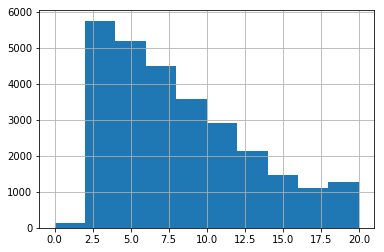

In [30]:
traveler_trips[traveler_trips.tripmode<=6].groupby(['hh_id']).count().person_id.hist(range=(0,20))